In [2]:
#적응형 임계처리
: 여러 영역으로 나눈 값

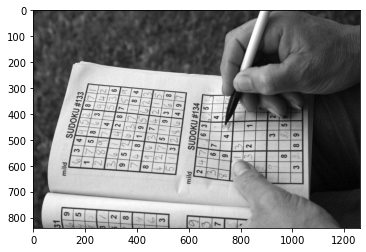

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

blk_size = 9
C = 5

image = cv2.imread('./images/sdocu.jpg',cv2. IMREAD_GRAYSCALE)
#image = image.astype(np.uint8)
ret, th1 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)



th2 = cv2.adaptiveThreshold(
    image, 
    40,
    cv2.ADAPTIVE_THRESH_MEAN_C, 
    cv2.THRESH_BINARY,
    blk_size, 
    C
)

th3 = cv2.adaptiveThreshold(
    image,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    blk_size,
    C
)

images = {
    'Original': image, 'Global-Otsu:%d'%ret:th1,
    'Adapted-Mean':th2, 'Adapted-Gaussian': th3
}



plt.imshow(image, cmap='gray')
plt.show()

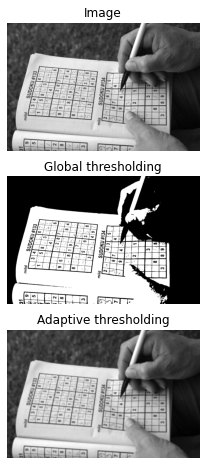

In [52]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage import filters


image = data.page()
image = cv2.imread('./images/sdocu.jpg',cv2. IMREAD_GRAYSCALE)

global_thresh = threshold_otsu(image)
binary_global = image > global_thresh

block_size = 13
binary_adaptive = filters.threshold_local(image, block_size, offset=10)
#threshold_local 임계값 나누는 것  block_size와 같이 사용
fig, axes = plt.subplots(nrows=3, figsize=(7, 8))
ax0, ax1, ax2 = axes
plt.gray()

ax0.imshow(image)
ax0.set_title('Image')

ax1.imshow(binary_global)
ax1.set_title('Global thresholding')

ax2.imshow(binary_adaptive)
ax2.set_title('Adaptive thresholding')

for ax in axes:
    ax.axis('off')

plt.show()

In [53]:
#산술연산

In [54]:
import cv2
import numpy as np

a = np.uint8([[200, 50]]) 
b = np.uint8([[100, 100]])

add1 = a + b
sub1 = a - b
mult1 = a * 2
div1 = a / 3

add2 = cv2.add(a, b)
sub2 = cv2.subtract(a, b)
mult2 = cv2.multiply(a , 2)
div2 = cv2.divide(a, 3)

print(add1, add2)
print(sub1, sub2)
print(mult1, mult2)
print(div1, div2)

[[ 44 150]] [[255 150]]
[[100 206]] [[100   0]]
[[144 100]] [[255 100]]
[[66.66666667 16.66666667]] [[67 17]]


In [ ]:
#이미지가 0~255까지임으로 저렇게 나오는것
#opencv는 최대값으로 표현 

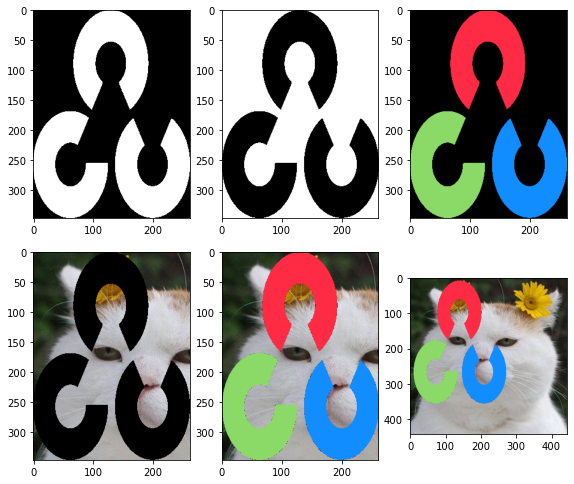

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_fg = cv2.imread('./images/opencv.png', cv2.IMREAD_UNCHANGED)
img_fg  = cv2.resize(img_fg, (int(2623*0.1), int(3472*0.1)))

img_bg = cv2.imread('./images/cat-01.jpg')
img_bg = cv2.cvtColor(img_bg, cv2.COLOR_BGR2RGB)

_, mask = cv2.threshold(
    img_fg[:, :, 3], 1, 255, cv2.THRESH_BINARY #[:, :, 3] 3은 4채널이 들어간것
) #자동으로 마스크 만들기 위해서

mask_inv = cv2.bitwise_not(mask) #값 inverse

img_fg = cv2.cvtColor(img_fg, cv2.COLOR_BGRA2BGR) #시각화위해 바꿈
h, w = img_fg.shape[:2]

roi = img_bg[10:10+h, 10:10+w]

img_fg = cv2.cvtColor(img_fg, cv2.COLOR_BGRA2RGB)
masked_fg = cv2.bitwise_and(img_fg, img_fg, mask=mask)
masked_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

added = masked_fg + masked_bg
img_bg[10:10+h, 10:10+w] = added

plt.figure(figsize=(8,10))
plt.subplot(331)
plt.imshow(mask, cmap='gray')
plt.subplot(332)
plt.imshow(mask_inv)
plt.subplot(333)
plt.imshow(masked_fg)
plt.subplot(334)
plt.imshow(masked_bg)
plt.subplot(335)
plt.imshow(added)
plt.subplot(336)
plt.imshow(img_bg)
plt.tight_layout()
plt.show()


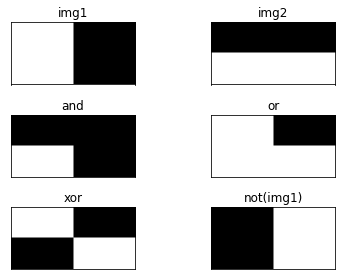

In [93]:
import cv2
import numpy as np
import matplotlib.pylab as plt

image1 = np.zeros((200, 400), dtype=np.uint8)
image2 = np.zeros((200, 400), dtype=np.uint8) #범위
image1[:, :200] = 255
image2[100:200, :] = 255 

bit_and = cv2.bitwise_and(image1, image2)
bit_or = cv2.bitwise_or(image1, image2)
bit_xor = cv2.bitwise_xor(image1, image2)
bit_not = cv2.bitwise_not(image1)

#--③ Plot으로 결과 출력
imgs = {
    'img1': image1, 'img2': image2, 'and': bit_and, 
    'or': bit_or, 'xor': bit_xor, 'not(img1)': bit_not
}
for i, (title, img) in enumerate(imgs.items()):
    plt.subplot(3,2,i+1)
    plt.title(title)
    plt.imshow(img, 'gray')
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
plt.show()

(443, 444, 3) (1913, 1920, 3)
(443, 444, 3) (443, 444, 3)


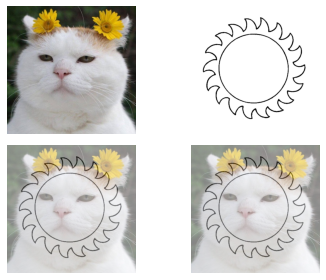

In [86]:
import cv2
import numpy as np
import matplotlib.pylab as plt

image1 = cv2.imread('./images/cat-01.jpg')
image2 = cv2.imread('./images/sun.jpeg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = image2[:,:,:: -1]
print(image1.shape, image2.shape)

image2 =cv2.resize(image2, (444, 443))
print(image1.shape, image2.shape)

image1 = image1.astype(np.uint8)
image2 = image2.astype(np.uint8)

alpha = 0.5

added = image1 +image2
blended = image1* alpha +image2*(1-alpha)
blended = blended.astype(np.uint8)
dst = cv2.addWeighted(image1, alpha, image2, (1-alpha), 0) 

plt.subplot(221)
plt.imshow(image1)
plt.axis('off')
plt.subplot(222)
plt.imshow(image2)
plt.axis('off')
plt.subplot(223)
plt.imshow(blended)
plt.axis('off')
plt.subplot(224)
plt.imshow(dst)
plt.axis('off')
plt.tight_layout()
plt.show()


(443, 444, 3) (555, 1024, 3)
(443, 444, 3) (443, 444, 3)


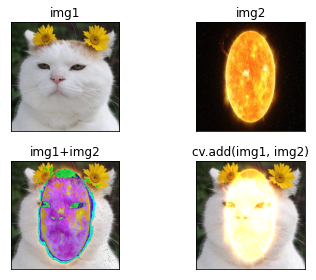

In [94]:
import cv2
import numpy as np
import matplotlib.pylab as plt

image1 = cv2.imread('./images/cat-01.jpg')
image2 = cv2.imread('./images/sun.jpeg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = image2[:,:,:: -1]
print(image1.shape, image2.shape)

image2 =cv2.resize(image2, (444, 443))
print(image1.shape, image2.shape)

image3 = image1 + image2
image4 = cv2.add(image1, image2)

images = {
    'img1' : image1,
    'img2' : image2,
    'img1+img2' : image3,
    'cv.add(img1, img2)' : image4
}

for i, (k, v) in enumerate(images.items()):
    plt.subplot(2,2, i + 1)
    plt.imshow(v)
    plt.title(k)
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

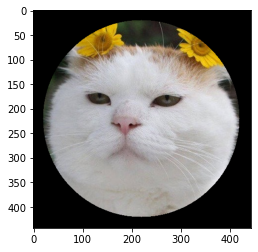

In [100]:
import numpy as np, cv2
import matplotlib.pylab as plt

img = cv2.imread('./images/cat-01.jpg')
mask = np.zeros_like(img)
cv2.circle(mask, (220, 220), 200, (255, 255, 255), -1) #센터, 중심값, 직경, 색상, -1:원 안에 색깔을 집어 넣겠다)
#cv2.rectangle(mask, (20,30), (400, 400),(255,255,255),-1)

masked = cv2.bitwise_and(img, mask)

plt.imshow(masked[...,::-1])
plt.show()

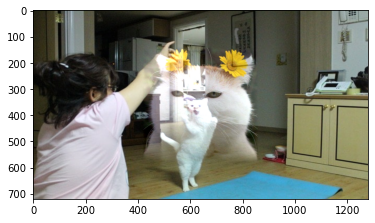

In [99]:
import cv2
import numpy as np
import matplotlib.pylab as plt
 
image1 = cv2.imread("./images/cat-01.jpg")
image2= cv2.imread("./images/cat-03.jpeg")
image2 = cv2.resize(image2, (1280, 720))

mask = np.full_like(image1, 255)

height, width = image2.shape[:2]
center = (width//2, height//2)

normal = cv2.seamlessClone(image1, image2, mask, center, cv2.NORMAL_CLONE)
mixed = cv2.seamlessClone(image1, image2, mask, center, cv2.MIXED_CLONE)

plt.imshow(mixed[:,:,::-1])
plt.show()